**Final Project**:

This Jupyter Notebook explores the severity of crimes in Tucson, Arizona, using data-driven techniques to classify offenses as either misdemeanors or felonies. The analysis incorporates demographic, temporal, and geographic data from various sources, including arrest records and neighborhood information. The notebook follows a structured workflow, starting with data cleaning and exploratory analysis, and progressing to feature engineering, model building, and evaluation. By leveraging machine learning models like Random Forest and Logistic Regression, the notebook aims to uncover key predictors of crime severity while addressing ethical considerations such as bias and fairness in predictive policing. The results provide actionable insights for law enforcement and policymakers to improve community safety.


Data Links:

https://gisdata.tucsonaz.gov/datasets/cotgis::neighborhood-age-demographics/explore?showTable=true

https://gisdata.tucsonaz.gov/datasets/cotgis::neighborhood-educational-attainment/explore?showTable=true

https://gisdata.tucsonaz.gov/datasets/cotgis::neighborhood-employment-demographics/explore?location=32.197863%2C-110.889177%2C10.12&showTable=true

https://gisdata.tucsonaz.gov/datasets/cotgis::neighborhood-income/explore?showTable=true

https://gisdata.tucsonaz.gov/datasets/cotgis::neighborhood-race-demographics/explore?showTable=true

https://gisdata.tucsonaz.gov/datasets/cotgis::tucson-police-reported-crimes/explore?showTable=true

https://gisdata.tucsonaz.gov/datasets/cotgis::tucson-police-arrests-2019-open-data/explore?location=0.000240%2C-111.225550%2C0.00&showTable=true

https://gisdata.tucsonaz.gov/datasets/cotgis::tucson-police-arrests-2020-open-data/explore?location=0.012819%2C-111.225550%2C0.00&showTable=true

https://gisdata.tucsonaz.gov/datasets/cotgis::tucson-police-arrests-2021-open-data/explore?location=0.683544%2C-111.225550%2C0.00&showTable=true

Name: Ashutosh Dayal, Jakob Garcia, Pri Vaghela

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [ ]:
age = pd.read_csv('https://drive.google.com/uc?id=1xkwzooZP2objWsDrx4b4XprQCMCYjLq1') # Neighborhood_Age_Demographics.csv
education = pd.read_csv('https://drive.google.com/uc?id=1t-p3nofZ2PocnE1-Hdsjzp55zEG4HZbA') # Neighborhood_Educational_Attainment.csv
employment = pd.read_csv('https://drive.google.com/uc?id=1d1Kmrh0Gs38hF-9SOOWhd9AwyYCHZCRJ') # Neighborhood_Employment_Demographics.csv
income = pd.read_csv('https://drive.google.com/uc?id=1RN2PCm3hXCXX7fmAGWAnaSIz1gCpBQET') # Neighborhood_Income.csv
race = pd.read_csv('https://drive.google.com/uc?id=1yXZVgRlg_W3_U204wSVb4nEPngH7XI0P') # Neighborhood_Race_Demographics.csv
# this dataset had trouble with the datatypes being read in, so here we manually set the types.
tprc = pd.read_csv('https://drive.google.com/uc?id=1eQ9akljN8WlmIr7u1VlxYzAipFG-nd85', dtype={
    'IncidentID': 'category',
    'DateOccurred': str,
    'Year': 'category',
    'Month': 'category',
    'Day': 'category',
    'TimeOccur': str,
    'Division': 'category',
    'Ward': 'category',
    'UCR': 'category',
    'UCRDescription' : str,
    'Offense': 'category',
    'OffenseDescription' : str,
    'CallSource' : 'category'
}) # Tucson_Police_Reported_Crimes.csv
tpa_2019 = pd.read_csv('https://drive.google.com/uc?id=1RY2vMQnsJQN8wUehOWBQM1-Zc4eavNSO', dtype={'case_id': 'object'}) # Tucson_Police_Arrests_20XX
tpa_2020 = pd.read_csv('https://drive.google.com/uc?id=164SBEk8xMmYsK7VhCByNTbVd0Kzqs6FU', dtype={'case_id': 'object'})
tpa_2021 = pd.read_csv('https://drive.google.com/uc?id=1U5QFFiR-BzET252GPeZcC0F1-33sgTvA', dtype={'case_id': 'object'})

# Data cleaning

## Cleaning the demographics

### Cleaning the age demographics

In [ ]:
age.head() # exploring the data
# There seems to be a mix of 2010 and 2019 data. Not all the demographic tables have 2010 info, so it seems best to just drop those columns
# Any aggregate column can also probably be dropped

,OBJECTID,NAME,WARD,DATASOURCE,ID,sourceCountry,ENRICH_FID,aggregationMethod,populationToPolygonSizeRating,apportionmentConfidence,...,POP65C10,POP70C10,POP75C10,POP80C10,POP85C10,ADULTS10,POP21UP10,MEDAGE10,MEDMAGE10,MEDFAGE10
0,1,A Mountain,1,NEIGHBORHOODS,0,US,1,BlockApportionment:US.BlockGroups,2.191,2.576,...,56,57,35,28,20,2247,2021,25.9,24.9,26.8
1,2,Adelanto,3,NEIGHBORHOODS,1,US,2,BlockApportionment:US.BlockGroups,2.191,2.576,...,9,6,7,6,4,236,212,25.3,24.1,26.9
2,3,Alvernon Heights,5,NEIGHBORHOODS,2,US,3,BlockApportionment:US.BlockGroups,2.191,2.576,...,8,6,4,4,2,207,190,28.1,26.9,29.6
3,4,Amphi,3,NEIGHBORHOODS,3,US,4,BlockApportionment:US.BlockGroups,2.191,2.576,...,156,119,75,49,36,5431,4953,28.8,29.0,28.7
4,5,Armory Park,6,NEIGHBORHOODS,4,US,5,BlockApportionment:US.BlockGroups,2.191,2.576,...,93,66,54,46,37,1616,1564,38.6,39.2,37.8


In [ ]:
print(f"Number of columns with NA's: {age.isnull().any().sum()}")

Number of columns with NA's: 0


In [ ]:
print(age['HasData'].value_counts()) # one row is missing data
print(age[age['HasData'] == 0]['ENRICH_FID']) # ID on 123
print(education[education['ENRICH_FID'] == 123]['HasData']) # every dataset seems to be missing this row, best to just drop it between all of them
print(race[race['ENRICH_FID'] == 123]['HasData'])
print(income[income['ENRICH_FID'] == 123]['HasData'])
print(employment[employment['ENRICH_FID'] == 123]['HasData'])
age.drop(age[age['ENRICH_FID'] == 123].index, inplace=True)
education.drop(education[education['ENRICH_FID'] == 123].index, inplace=True)
race.drop(race[race['ENRICH_FID'] == 123].index, inplace=True)
income.drop(income[income['ENRICH_FID'] == 123].index, inplace=True)
employment.drop(employment[employment['ENRICH_FID'] == 123].index, inplace=True)

# reset the indices so we can remove the ENRICH_FID column
age.reset_index(drop=True, inplace=True)
education.reset_index(drop=True, inplace=True)
race.reset_index(drop=True, inplace=True)
income.reset_index(drop=True, inplace=True)
employment.reset_index(drop=True, inplace=True)
# drop the column
age.drop(columns=['ENRICH_FID'], inplace=True)
education.drop(columns=['ENRICH_FID'], inplace=True)
race.drop(columns=['ENRICH_FID'], inplace=True)
income.drop(columns=['ENRICH_FID'], inplace=True)
employment.drop(columns=['ENRICH_FID'], inplace=True)

# Save the names mapped to the indices
neighborhoods = age['NAME']

HasData
1    158
0      1
Name: count, dtype: int64
122    123
Name: ENRICH_FID, dtype: int64
122    0
Name: HasData, dtype: int64
122    0
Name: HasData, dtype: int64
122    0
Name: HasData, dtype: int64
122    0
Name: HasData, dtype: int64


In [ ]:
print(age['DATASOURCE'].unique()) # these columns contain only one value, best to remove
print(age['sourceCountry'].unique())
print(age['aggregationMethod'].unique())
print(age['populationToPolygonSizeRating'].unique())
print(age['apportionmentConfidence'].unique())
age.drop(columns=['DATASOURCE', 'OBJECTID', 'ID', 'NAME', 'sourceCountry', 'aggregationMethod', 'HasData', 'populationToPolygonSizeRating', 'apportionmentConfidence'], inplace=True)
age['WARD'] = age['WARD'].astype('category')
age.head()

['NEIGHBORHOODS']
['US']
['BlockApportionment:US.BlockGroups']
[2.191]
[2.576]


,WARD,TOTPOP10,TOTPOP_CY,POP0_CY,POP5_CY,POP10_CY,POP15_CY,POP20_CY,POP25_CY,POP30_CY,...,POP65C10,POP70C10,POP75C10,POP80C10,POP85C10,ADULTS10,POP21UP10,MEDAGE10,MEDMAGE10,MEDFAGE10
0,1,3342,3448,339,281,235,265,415,454,288,...,56,57,35,28,20,2247,2021,25.9,24.9,26.8
1,3,373,389,42,38,38,38,34,32,25,...,9,6,7,6,4,236,212,25.3,24.1,26.9
2,5,304,320,28,27,25,26,26,32,25,...,8,6,4,4,2,207,190,28.1,26.9,29.6
3,3,7461,7464,637,533,459,498,749,850,647,...,156,119,75,49,36,5431,4953,28.8,29.0,28.7
4,6,1814,1924,66,67,56,58,119,209,206,...,93,66,54,46,37,1616,1564,38.6,39.2,37.8


In [ ]:
# get rid of the 2010 data
age.drop(columns=[column for column in age.columns if ('10' in column and column !='POP10_CY') or 'TOT' in column or 'MED' in column]+['POP18UP_CY'], inplace=True)
age.head()

,WARD,POP0_CY,POP5_CY,POP10_CY,POP15_CY,POP20_CY,POP25_CY,POP30_CY,POP35_CY,POP40_CY,POP45_CY,POP50_CY,POP55_CY,POP60_CY,POP65_CY,POP70_CY,POP75_CY,POP80_CY,POP85_CY
0,1,339,281,235,265,415,454,288,181,160,161,145,146,126,98,67,35,29,23
1,3,42,38,38,38,34,32,25,20,19,19,18,18,14,13,9,5,3,4
2,5,28,27,25,26,26,32,25,21,17,19,15,16,15,10,7,5,3,3
3,3,637,533,459,498,749,850,647,493,403,420,420,390,345,248,164,100,61,45
4,6,66,67,56,58,119,209,206,172,121,117,103,114,126,114,110,67,55,45


In [ ]:
age.info()
age.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   WARD      158 non-null    category
 1   POP0_CY   158 non-null    int64   
 2   POP5_CY   158 non-null    int64   
 3   POP10_CY  158 non-null    int64   
 4   POP15_CY  158 non-null    int64   
 5   POP20_CY  158 non-null    int64   
 6   POP25_CY  158 non-null    int64   
 7   POP30_CY  158 non-null    int64   
 8   POP35_CY  158 non-null    int64   
 9   POP40_CY  158 non-null    int64   
 10  POP45_CY  158 non-null    int64   
 11  POP50_CY  158 non-null    int64   
 12  POP55_CY  158 non-null    int64   
 13  POP60_CY  158 non-null    int64   
 14  POP65_CY  158 non-null    int64   
 15  POP70_CY  158 non-null    int64   
 16  POP75_CY  158 non-null    int64   
 17  POP80_CY  158 non-null    int64   
 18  POP85_CY  158 non-null    int64   
dtypes: category(1), int64(18)
memory usage: 22.7 KB


,POP0_CY,POP5_CY,POP10_CY,POP15_CY,POP20_CY,POP25_CY,POP30_CY,POP35_CY,POP40_CY,POP45_CY,POP50_CY,POP55_CY,POP60_CY,POP65_CY,POP70_CY,POP75_CY,POP80_CY,POP85_CY
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,162.664557,154.569620,148.930380,170.227848,231.797468,221.803797,186.341772,157.835443,137.424051,137.822785,136.253165,147.943038,138.272152,117.734177,89.917722,58.658228,39.556962,44.202532
std,220.133272,212.185725,205.074668,226.389380,287.027701,256.541090,208.378415,184.417791,166.496200,166.387489,157.972784,164.201222,145.813451,124.925885,97.695352,66.258976,47.362337,58.390925
min,1.000000,2.000000,0.000000,3.000000,4.000000,6.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000
25%,29.000000,28.000000,26.000000,32.250000,40.750000,56.000000,45.250000,37.000000,31.500000,30.000000,32.500000,40.500000,37.250000,35.000000,26.250000,16.000000,11.000000,11.000000
50%,80.500000,76.500000,69.500000,92.000000,132.000000,122.500000,115.000000,93.500000,82.500000,78.000000,86.500000,93.500000,81.500000,68.500000,47.000000,29.000000,19.000000,23.500000
75%,241.500000,224.500000,221.750000,233.000000,301.250000,299.250000,243.250000,216.000000,182.750000,175.500000,175.750000,193.750000,187.750000,164.750000,132.500000,81.250000,60.000000,55.750000
max,1319.000000,1340.000000,1369.000000,1423.000000,1551.000000,1521.000000,1208.000000,1303.000000,1268.000000,1254.000000,1180.000000,1115.000000,827.000000,653.000000,530.000000,381.000000,325.000000,533.000000


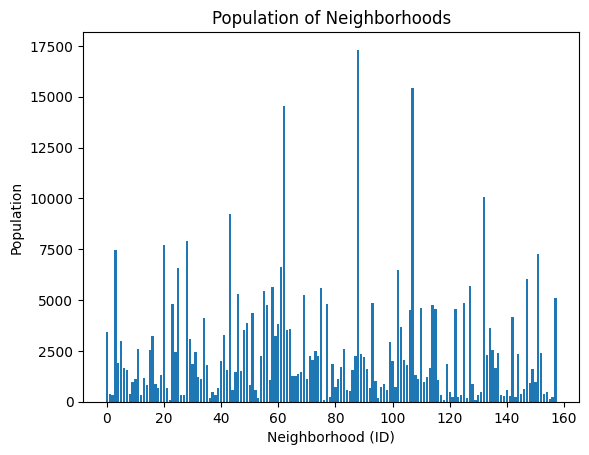

In [ ]:
# there are big differences between the 75% and the max values, but this doesn't mean the data is incorrect, the max can just be a more
# populated neighborhood.
plt.bar(age.index, age[age.columns[1:]].sum(axis=1))
plt.title('Population of Neighborhoods')
plt.xlabel('Neighborhood (ID)')
plt.ylabel('Population')
plt.show()

In [ ]:
# these are the large values above, and after a Google search, they do seem to have higher populations and are
# masterplanned communities.
print(neighborhoods.iloc[62])
print(neighborhoods.iloc[88])
print(neighborhoods.iloc[107])

Midvale Park
Rita Ranch
Sunnyside


### Cleaning the education demographics

In [ ]:
education.head() # exploring the data

,OBJECTID,NAME,WARD,DATASOURCE,ID,sourceCountry,aggregationMethod,populationToPolygonSizeRating,apportionmentConfidence,HasData,NOHS_CY,SOMEHS_CY,HSGRAD_CY,GED_CY,SMCOLL_CY,ASSCDEG_CY,BACHDEG_CY,GRADDEG_CY,EDUCBASECY
0,1,A Mountain,1,NEIGHBORHOODS,0,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,382,291,323,187,498,131,88,13,1913
1,2,Adelanto,3,NEIGHBORHOODS,1,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,54,34,55,17,9,10,10,11,200
2,3,Alvernon Heights,5,NEIGHBORHOODS,2,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,3,21,34,17,69,12,26,7,189
3,4,Amphi,3,NEIGHBORHOODS,3,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,405,697,954,232,1260,395,432,213,4588
4,5,Armory Park,6,NEIGHBORHOODS,4,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,65,70,138,73,287,71,404,449,1557


In [ ]:
print(f"Number of columns with NA's: {education.isnull().any().sum()}")

Number of columns with NA's: 0


In [ ]:
print(education['DATASOURCE'].unique()) # these columns contain only one value, best remove
print(education['sourceCountry'].unique())
print(education['aggregationMethod'].unique())
print(education['populationToPolygonSizeRating'].unique())
print(education['apportionmentConfidence'].unique())
education.drop(columns=['DATASOURCE', 'OBJECTID', 'ID', 'NAME', 'sourceCountry', 'aggregationMethod', 'HasData',
                        'populationToPolygonSizeRating', 'apportionmentConfidence', 'EDUCBASECY'], inplace=True)
education['WARD'] = education['WARD'].astype('category')
education.head()
# the edubase column seems to be the sum of the other columns. This is unnecessary

['NEIGHBORHOODS']
['US']
['BlockApportionment:US.BlockGroups']
[2.191]
[2.576]


,WARD,NOHS_CY,SOMEHS_CY,HSGRAD_CY,GED_CY,SMCOLL_CY,ASSCDEG_CY,BACHDEG_CY,GRADDEG_CY
0,1,382,291,323,187,498,131,88,13
1,3,54,34,55,17,9,10,10,11
2,5,3,21,34,17,69,12,26,7
3,3,405,697,954,232,1260,395,432,213
4,6,65,70,138,73,287,71,404,449


In [ ]:
education.info()
education.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   WARD        158 non-null    category
 1   NOHS_CY     158 non-null    int64   
 2   SOMEHS_CY   158 non-null    int64   
 3   HSGRAD_CY   158 non-null    int64   
 4   GED_CY      158 non-null    int64   
 5   SMCOLL_CY   158 non-null    int64   
 6   ASSCDEG_CY  158 non-null    int64   
 7   BACHDEG_CY  158 non-null    int64   
 8   GRADDEG_CY  158 non-null    int64   
dtypes: category(1), int64(8)
memory usage: 10.4 KB


,NOHS_CY,SOMEHS_CY,HSGRAD_CY,GED_CY,SMCOLL_CY,ASSCDEG_CY,BACHDEG_CY,GRADDEG_CY
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,98.145570,147.601266,306.639241,76.310127,399.911392,139.835443,263.018987,182.227848
std,165.713775,232.631442,395.999923,101.616420,482.505264,197.917626,300.962352,219.034997
min,0.000000,0.000000,3.000000,0.000000,9.000000,1.000000,0.000000,0.000000
25%,7.000000,19.500000,58.500000,13.250000,89.750000,28.000000,79.000000,43.000000
50%,34.000000,56.500000,146.000000,39.000000,240.500000,71.500000,159.500000,121.500000
75%,127.750000,213.250000,394.250000,107.500000,498.000000,155.750000,322.500000,232.500000
max,1345.000000,1795.000000,2117.000000,799.000000,3092.000000,1714.000000,2377.000000,1645.000000


### Cleaning the employment demographics

In [ ]:
employment.head() # exploring the data

,OBJECTID,NAME,WARD,DATASOURCE,ID,sourceCountry,aggregationMethod,populationToPolygonSizeRating,apportionmentConfidence,HasData,...,INDHLTH_CY,INDARTS_CY,INDFOOD_CY,INDOTSV_CY,INDPUBL_CY,UNEMP_CY,UNEMPRT_CY,ACSCIVPOP,ACSVET,ACSNONVET
0,1,A Mountain,1,NEIGHBORHOODS,0,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,...,137,58,229,101,161,243,15.5,2412,113,2299
1,2,Adelanto,3,NEIGHBORHOODS,1,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,...,10,1,26,10,3,18,13.8,269,8,261
2,3,Alvernon Heights,5,NEIGHBORHOODS,2,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,...,8,10,33,8,0,31,19.9,233,7,226
3,4,Amphi,3,NEIGHBORHOODS,3,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,...,409,31,638,205,113,330,8.9,5753,339,5414
4,5,Armory Park,6,NEIGHBORHOODS,4,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,...,166,21,120,37,71,26,2.4,1685,111,1574


In [ ]:
print(f"Number of columns with NA's: {employment.isnull().any().sum()}")

Number of columns with NA's: 0


In [ ]:
print(employment['DATASOURCE'].unique()) # these columns contain only one value, best remove
print(employment['sourceCountry'].unique())
print(employment['aggregationMethod'].unique())
print(employment['populationToPolygonSizeRating'].unique())
print(employment['apportionmentConfidence'].unique())
employment.drop(columns=['DATASOURCE', 'OBJECTID', 'ID', 'NAME', 'sourceCountry', 'aggregationMethod', 'HasData', 'populationToPolygonSizeRating', 'apportionmentConfidence'], inplace=True)
employment['WARD'] = employment['WARD'].astype('category')
employment.head()

['NEIGHBORHOODS']
['US']
['BlockApportionment:US.BlockGroups']
[2.191]
[2.576]


,WARD,ACSTOTPOP,OCCBASE_CY,OCCMGMT_CY,OCCBUS_CY,OCCCOMP_CY,OCCARCH_CY,OCCSSCI_CY,OCCSSRV_CY,OCCLEGL_CY,...,INDHLTH_CY,INDARTS_CY,INDFOOD_CY,INDOTSV_CY,INDPUBL_CY,UNEMP_CY,UNEMPRT_CY,ACSCIVPOP,ACSVET,ACSNONVET
0,1,2924,1320,20,58,0,0,0,10,0,...,137,58,229,101,161,243,15.5,2412,113,2299
1,3,419,112,1,5,1,0,0,2,0,...,10,1,26,10,3,18,13.8,269,8,261
2,5,332,125,9,0,0,0,0,0,0,...,8,10,33,8,0,31,19.9,233,7,226
3,3,7837,3360,155,46,56,35,19,24,5,...,409,31,638,205,113,330,8.9,5753,339,5414
4,6,1944,1079,87,33,22,21,28,39,37,...,166,21,120,37,71,26,2.4,1685,111,1574


In [ ]:
# There are a lot of different columns for different occupations, so I'm going to group together white collar and blue collar jobs to reduce the
# number of columns
white_collar = ['OCCMGMT_CY', 'OCCBUS_CY', 'OCCCOMP_CY', 'OCCARCH_CY', 'OCCSSCI_CY', 'OCCSSRV_CY', 'OCCLEGL_CY', 'OCCEDUC_CY', 'OCCENT_CY',
                'OCCHTCH_CY', 'OCCHLTH_CY', 'OCCSALE_CY', 'OCCADMN_CY', 'INDINFO_CY', 'INDFIN_CY', 'INDRE_CY', 'INDTECH_CY', 'INDMGMT_CY',
                'INDEDUC_CY', 'INDHLTH_CY', 'INDADMN_CY', 'INDARTS_CY', 'INDPUBL_CY']
employment['White_Collar'] = employment[white_collar].sum(axis=1)
employment.drop(columns=white_collar, inplace=True)

blue_collar = ['OCCPROT_CY', 'OCCFOOD_CY', 'OCCBLDG_CY', 'OCCFARM_CY', 'OCCCONS_CY', 'OCCMAIN_CY', 'OCCPROD_CY', 'OCCTRAN_CY', 'OCCPERS_CY',
               'INDAGRI_CY', 'INDMIN_CY', 'INDCONS_CY', 'INDMANU_CY', 'INDWHTR_CY', 'INDRTTR_CY', 'INDTRAN_CY', 'INDUTIL_CY', 'INDFOOD_CY', 'INDOTSV_CY']
employment['Blue_Collar'] = employment[blue_collar].sum(axis=1)
employment.drop(columns=blue_collar, inplace=True)
# Drop other metrics, but keep unemployment rates and veteran demographics
employment.drop(columns=['ACSTOTPOP', 'OCCBASE_CY', 'CIVLBFR_CY', 'EMP_CY', 'INDBASE_CY', 'UNEMP_CY', 'ACSCIVPOP'], inplace=True)
employment.head()

,WARD,UNEMPRT_CY,ACSVET,ACSNONVET,White_Collar,Blue_Collar
0,1,15.5,113,2299,1340,1300
1,3,13.8,8,261,70,155
2,5,19.9,7,226,116,133
3,3,8.9,339,5414,2937,3786
4,6,2.4,111,1574,1538,620


In [ ]:
employment.info()
employment.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   WARD          158 non-null    category
 1   UNEMPRT_CY    158 non-null    float64 
 2   ACSVET        158 non-null    int64   
 3   ACSNONVET     158 non-null    int64   
 4   White_Collar  158 non-null    int64   
 5   Blue_Collar   158 non-null    int64   
dtypes: category(1), float64(1), int64(4)
memory usage: 6.7 KB


,UNEMPRT_CY,ACSVET,ACSNONVET,White_Collar,Blue_Collar
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,7.579114,151.639241,1689.335443,1261.816456,995.278481
std,4.833272,216.495899,1806.228307,1405.304794,1181.154126
min,0.000000,2.000000,47.000000,35.000000,22.000000
25%,3.800000,26.250000,450.500000,420.000000,195.250000
50%,6.900000,85.500000,1161.000000,813.500000,561.500000
75%,10.150000,188.250000,2247.500000,1649.750000,1333.750000
max,23.600000,1936.000000,11190.000000,10729.000000,6628.000000


### Cleaning the income demographics

In [ ]:
income.head() # exploring the data
# there are a LOT of columns in this one, and I don't know the specific differences from group to group. It may be best to select
# a subset of the columns to use and document that

,OBJECTID,NAME,WARD,DATASOURCE,ID,sourceCountry,aggregationMethod,populationToPolygonSizeRating,apportionmentConfidence,HasData,...,AGGDIA75CY,ID_1,sourceCountry_1,ENRICH_FID_1,aggregationMethod_1,populationToPolygonSizeRating_1,apportionmentConfidence_1,HasData_1,TOTHH_CY,WLTHINDXCY
0,1,A Mountain,1,NEIGHBORHOODS,0,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,...,1590160,0,US,1,BlockApportionment:US.BlockGroups,2.191,2.576,1,1103,32
1,2,Adelanto,3,NEIGHBORHOODS,1,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,...,154598,1,US,2,BlockApportionment:US.BlockGroups,2.191,2.576,1,117,28
2,3,Alvernon Heights,5,NEIGHBORHOODS,2,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,...,172634,2,US,3,BlockApportionment:US.BlockGroups,2.191,2.576,1,99,26
3,4,Amphi,3,NEIGHBORHOODS,3,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,...,2760918,3,US,4,BlockApportionment:US.BlockGroups,2.191,2.576,1,3105,20
4,5,Armory Park,6,NEIGHBORHOODS,4,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,...,3785750,4,US,5,BlockApportionment:US.BlockGroups,2.191,2.576,1,1223,48


In [ ]:
print(f"Number of columns with NA's: {income.isnull().any().sum()}")

Number of columns with NA's: 0


In [ ]:
print(income['DATASOURCE'].unique()) # these columns contain only one value, best remove. Some of the columns also seem duplicated?
print(income['sourceCountry'].unique())
print(income['aggregationMethod'].unique())
print(income['populationToPolygonSizeRating'].unique())
print(income['apportionmentConfidence'].unique())
income.drop(columns=['DATASOURCE', 'OBJECTID', 'ID', 'NAME', 'sourceCountry', 'aggregationMethod', 'HasData', 'populationToPolygonSizeRating', 'apportionmentConfidence',
                  'ID_1', 'sourceCountry_1', 'ENRICH_FID_1', 'aggregationMethod_1', 'populationToPolygonSizeRating_1', 'apportionmentConfidence_1', 'HasData_1'], inplace=True)
income['WARD'] = income['WARD'].astype('category')
income.head()

['NEIGHBORHOODS']
['US']
['BlockApportionment:US.BlockGroups']
[2.191]
[2.576]


,WARD,HINC0_CY,HINC15_CY,HINC25_CY,HINC35_CY,HINC50_CY,HINC75_CY,HINC100_CY,HINC150_CY,HINC200_CY,...,AVGDIA55CY,AGGDIA55CY,MEDDIA65CY,AVGDIA65CY,AGGDIA65CY,MEDDIA75CY,AVGDIA75CY,AGGDIA75CY,TOTHH_CY,WLTHINDXCY
0,1,125,132,221,200,222,161,42,0,0,...,40198,6552335,28361,32211,3446610,21694,29447,1590160,1103,32
1,3,27,19,14,31,8,9,8,1,0,...,33852,710884,27786,33296,466151,15000,15460,154598,117,28
2,5,25,19,11,19,14,5,7,0,0,...,33956,543298,26079,26937,269373,19272,24662,172634,99,26
3,3,1102,709,406,277,359,148,80,25,0,...,24716,12605343,16381,22008,6338310,16386,20451,2760918,3105,20
4,6,366,131,80,205,149,78,88,58,69,...,55135,9262743,24667,42677,8193973,12750,24583,3785750,1223,48


In [ ]:
# There is a lot of different income data, but not all of it is probably necessary. We'll focus more on using the household income and disposable income
# We'll also keep the metric of how many houses are on food stamps.
income.drop(columns=[column for column in income.columns if 'AGG' in column or 'AVG' in column or 'MED' in column], inplace=True)
income = income.iloc[:, :23]
income.drop(columns=['HINCBASECY', 'PCI_CY', 'DIBASE_CY'], inplace=True)
income.head()

,WARD,HINC0_CY,HINC15_CY,HINC25_CY,HINC35_CY,HINC50_CY,HINC75_CY,HINC100_CY,HINC150_CY,HINC200_CY,ACSSNAP,DI0_CY,DI15_CY,DI25_CY,DI35_CY,DI50_CY,DI75_CY,DI100_CY,DI150_CY,DI200_CY
0,1,125,132,221,200,222,161,42,0,0,399,149,179,226,214,262,57,16,0,0
1,3,27,19,14,31,8,9,8,1,0,58,30,21,23,20,13,7,4,0,0
2,5,25,19,11,19,14,5,7,0,0,49,28,19,15,18,12,5,3,0,0
3,3,1102,709,406,277,359,148,80,25,0,1158,1236,707,375,320,337,76,53,1,0
4,6,366,131,80,205,149,78,88,58,69,112,391,132,128,191,149,67,96,37,33


In [ ]:
income.info()
income.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   WARD        158 non-null    category
 1   HINC0_CY    158 non-null    int64   
 2   HINC15_CY   158 non-null    int64   
 3   HINC25_CY   158 non-null    int64   
 4   HINC35_CY   158 non-null    int64   
 5   HINC50_CY   158 non-null    int64   
 6   HINC75_CY   158 non-null    int64   
 7   HINC100_CY  158 non-null    int64   
 8   HINC150_CY  158 non-null    int64   
 9   HINC200_CY  158 non-null    int64   
 10  ACSSNAP     158 non-null    int64   
 11  DI0_CY      158 non-null    int64   
 12  DI15_CY     158 non-null    int64   
 13  DI25_CY     158 non-null    int64   
 14  DI35_CY     158 non-null    int64   
 15  DI50_CY     158 non-null    int64   
 16  DI75_CY     158 non-null    int64   
 17  DI100_CY    158 non-null    int64   
 18  DI150_CY    158 non-null    int64   
 19  DI200_CY

,HINC0_CY,HINC15_CY,HINC25_CY,HINC35_CY,HINC50_CY,HINC75_CY,HINC100_CY,HINC150_CY,HINC200_CY,ACSSNAP,DI0_CY,DI15_CY,DI25_CY,DI35_CY,DI50_CY,DI75_CY,DI100_CY,DI150_CY,DI200_CY
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,177.550633,132.398734,112.291139,149.082278,170.037975,99.670886,93.069620,27.620253,19.588608,191.436709,200.265823,145.848101,132.500000,162.455696,177.797468,77.018987,64.949367,11.031646,9.417722
std,205.772076,158.227802,124.510522,156.803864,194.530036,128.064198,165.202679,53.383435,37.191042,254.662270,231.200203,168.588263,140.482959,173.929285,210.465446,125.262144,112.222584,20.675972,17.743112
min,3.000000,0.000000,0.000000,3.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,4.000000,5.000000,1.000000,1.000000,0.000000,0.000000
25%,30.500000,26.750000,23.500000,37.250000,40.000000,17.500000,21.000000,4.000000,2.000000,28.000000,35.250000,33.250000,32.750000,44.000000,41.250000,17.000000,16.250000,1.000000,1.000000
50%,106.500000,72.000000,75.000000,97.500000,99.500000,51.500000,42.500000,12.500000,7.000000,86.500000,119.500000,82.500000,94.500000,109.000000,104.500000,39.000000,30.500000,4.000000,3.000000
75%,224.750000,181.250000,147.500000,192.500000,221.750000,130.000000,107.500000,27.750000,23.500000,271.750000,260.000000,194.750000,161.250000,213.250000,241.750000,85.250000,67.500000,12.750000,10.750000
max,1102.000000,830.000000,659.000000,952.000000,1129.000000,974.000000,1753.000000,516.000000,277.000000,1645.000000,1236.000000,903.000000,778.000000,1039.000000,1462.000000,1286.000000,1136.000000,166.000000,129.000000


### Cleaning the race demographics

In [ ]:
race.head() # exploring the data
# has 2010 info as well. The 2010 info seems to have been gathered differently than the 2019

,OBJECTID,NAME,WARD,DATASOURCE,ID,sourceCountry,aggregationMethod,populationToPolygonSizeRating,apportionmentConfidence,HasData,...,NHSPPI_CY,NHSPOTH_CY,NHSPMLT_CY,RACEBASECY,WHTNHISP10,RACEBASE10,POP1RACE10,ADRACBAS10,AD1RACE10,DIVINDX_CY
0,1,A Mountain,1,NEIGHBORHOODS,0,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,...,3,10,41,3448,352,3342,3194,2247,2157,87.9
1,2,Adelanto,3,NEIGHBORHOODS,1,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,...,0,1,8,389,49,372,354,236,227,90.5
2,3,Alvernon Heights,5,NEIGHBORHOODS,2,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,...,1,0,7,320,85,304,285,207,197,81.4
3,4,Amphi,3,NEIGHBORHOODS,3,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,...,20,8,262,7462,2502,7462,6995,5431,5168,85.2
4,5,Armory Park,6,NEIGHBORHOODS,4,US,BlockApportionment:US.BlockGroups,2.191,2.576,1,...,1,4,52,1924,1026,1813,1721,1616,1552,72.0


In [ ]:
print(f"Number of columns with NA's: {race.isnull().any().sum()}")

Number of columns with NA's: 0


In [ ]:
print(race['DATASOURCE'].unique()) # these columns contain only one value, best remove. Some of the columns also seem duplicated?
print(race['sourceCountry'].unique())
print(race['aggregationMethod'].unique())
print(race['populationToPolygonSizeRating'].unique())
print(race['apportionmentConfidence'].unique())
race.drop(columns=['DATASOURCE', 'OBJECTID', 'ID', 'NAME', 'sourceCountry', 'aggregationMethod', 'HasData', 'populationToPolygonSizeRating', 'apportionmentConfidence'], inplace=True)
race['WARD'] = race['WARD'].astype('category')
race.head()

['NEIGHBORHOODS']
['US']
['BlockApportionment:US.BlockGroups']
[2.191]
[2.576]


,WARD,WHITE_CY,BLACK_CY,AMERIND_CY,ASIAN_CY,PACIFIC_CY,OTHRACE_CY,RACE2UP_CY,HISPPOP_CY,MINORITYCY,...,NHSPPI_CY,NHSPOTH_CY,NHSPMLT_CY,RACEBASECY,WHTNHISP10,RACEBASE10,POP1RACE10,ADRACBAS10,AD1RACE10,DIVINDX_CY
0,1,1443,316,227,68,3,1236,155,2638,3164,...,3,10,41,3448,352,3342,3194,2247,2157,87.9
1,3,123,43,106,5,0,92,20,218,348,...,0,1,8,389,49,372,354,236,227,90.5
2,5,186,31,7,7,1,67,21,201,246,...,1,0,7,320,85,304,285,207,197,81.4
3,3,3967,612,314,469,26,1579,495,3898,5380,...,20,8,262,7462,2502,7462,6995,5431,5168,85.2
4,6,1411,66,61,41,3,229,113,776,958,...,1,4,52,1924,1026,1813,1721,1616,1552,72.0


In [ ]:
# The 2010 info can be dropped since it was collected differently and there isn't consistency across demographics
# I'm also dropping a lot of the more granular Hispanic data, and just using the general Hispanic population column.
race.drop(columns=[column for column in race.columns if '10' in column or 'NH' in column or ('HISP' in column and column != 'HISPPOP_CY')] +['RACEBASECY'], inplace=True)
race.head()

,WARD,WHITE_CY,BLACK_CY,AMERIND_CY,ASIAN_CY,PACIFIC_CY,OTHRACE_CY,RACE2UP_CY,HISPPOP_CY,MINORITYCY,DIVINDX_CY
0,1,1443,316,227,68,3,1236,155,2638,3164,87.9
1,3,123,43,106,5,0,92,20,218,348,90.5
2,5,186,31,7,7,1,67,21,201,246,81.4
3,3,3967,612,314,469,26,1579,495,3898,5380,85.2
4,6,1411,66,61,41,3,229,113,776,958,72.0


In [ ]:
race.info()
race.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   WARD        158 non-null    category
 1   WHITE_CY    158 non-null    int64   
 2   BLACK_CY    158 non-null    int64   
 3   AMERIND_CY  158 non-null    int64   
 4   ASIAN_CY    158 non-null    int64   
 5   PACIFIC_CY  158 non-null    int64   
 6   OTHRACE_CY  158 non-null    int64   
 7   RACE2UP_CY  158 non-null    int64   
 8   HISPPOP_CY  158 non-null    int64   
 9   MINORITYCY  158 non-null    int64   
 10  DIVINDX_CY  158 non-null    float64 
dtypes: category(1), float64(1), int64(9)
memory usage: 12.8 KB


,WHITE_CY,BLACK_CY,AMERIND_CY,ASIAN_CY,PACIFIC_CY,OTHRACE_CY,RACE2UP_CY,HISPPOP_CY,MINORITYCY,DIVINDX_CY
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,1630.012658,125.778481,74.500000,81.405063,5.715190,446.829114,117.670886,1189.170886,1485.746835,70.417089
std,1826.533541,155.514663,102.563248,105.281427,10.007062,733.193939,132.324752,1834.711485,2033.046059,11.757676
min,44.000000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,16.000000,26.000000,39.500000
25%,477.000000,23.250000,14.000000,14.000000,0.000000,68.250000,27.250000,218.500000,298.500000,61.875000
50%,1062.500000,68.500000,40.500000,38.500000,2.000000,168.500000,78.000000,538.000000,793.500000,71.500000
75%,2120.750000,161.500000,99.750000,100.250000,6.750000,540.750000,154.500000,1496.000000,1972.750000,80.075000
max,13274.000000,987.000000,743.000000,707.000000,76.000000,5036.000000,975.000000,13975.000000,14723.000000,90.500000


## Concatenating the data together


In [ ]:
# Merge all the demographics into one dataframe. iloc here is used to slice off the WARD column from being repeated for each df
demographics = pd.concat([age, education.iloc[:,1:], race.iloc[:,1:], income.iloc[:,1:], employment.iloc[:,1:], neighborhoods], axis=1)
demographics.head()

,WARD,POP0_CY,POP5_CY,POP10_CY,POP15_CY,POP20_CY,POP25_CY,POP30_CY,POP35_CY,POP40_CY,...,DI75_CY,DI100_CY,DI150_CY,DI200_CY,UNEMPRT_CY,ACSVET,ACSNONVET,White_Collar,Blue_Collar,NAME
0,1,339,281,235,265,415,454,288,181,160,...,57,16,0,0,15.5,113,2299,1340,1300,A Mountain
1,3,42,38,38,38,34,32,25,20,19,...,7,4,0,0,13.8,8,261,70,155,Adelanto
2,5,28,27,25,26,26,32,25,21,17,...,5,3,0,0,19.9,7,226,116,133,Alvernon Heights
3,3,637,533,459,498,749,850,647,493,403,...,76,53,1,0,8.9,339,5414,2937,3786,Amphi
4,6,66,67,56,58,119,209,206,172,121,...,67,96,37,33,2.4,111,1574,1538,620,Armory Park


## Cleaning the Tucson Police Reported Crimes

In [ ]:
tprc.head() # exploring the data
# use cyclical transformer for date time?

,IncidentID,DateOccurred,Year,Month,Day,TimeOccur,Division,Ward,UCR,UCRDescription,Offense,OffenseDescription,CallSource,ESRI_OID
0,1800330010,2018/03/30 00:00:00+00,2018,March,Fri,2054,Midtown,6,05,05 - BURGLARY,0501,Burglary - Force,NaN,1
1,0807190154,2018/06/15 00:00:00+00,2018,June,Fri,0243,South,1,01,01 - HOMICIDE,0101,Criminal Homicide - Murder,NaN,2
2,1801010138,2018/01/01 00:00:00+00,2018,January,Mon,0412,Midtown,3,03,03 - ROBBERY,0304,Robbery - Convenience Stores,Call For Service,3
3,1801010111,2018/01/01 00:00:00+00,2018,January,Mon,0324,South,1,04,"04 - ASSAULT, AGGRAVATED",0413,Aggravated Assault - Domestic Violence (DV),Call For Service,4
4,1801010244,2018/01/01 00:00:00+00,2018,January,Mon,0950,South,5,06,06 - LARCENY,0610,Larceny - All Other,Call For Service,5


In [ ]:
tprc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181688 entries, 0 to 181687
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   IncidentID          181688 non-null  category
 1   DateOccurred        181688 non-null  object  
 2   Year                181688 non-null  category
 3   Month               181688 non-null  category
 4   Day                 181688 non-null  category
 5   TimeOccur           181688 non-null  object  
 6   Division            179690 non-null  category
 7   Ward                177781 non-null  category
 8   UCR                 181688 non-null  category
 9   UCRDescription      181688 non-null  object  
 10  Offense             181688 non-null  category
 11  OffenseDescription  181688 non-null  object  
 12  CallSource          179570 non-null  category
 13  ESRI_OID            181688 non-null  int64   
dtypes: category(9), int64(1), object(4)
memory usage: 14.4+ MB


In [ ]:
print(len(tprc['IncidentID'].unique())) # large majority of the IDs are unique
print(tprc['Year'].unique()) # year month and days seem good
print(tprc['Month'].unique())
print(tprc['Day'].unique())
tprc['TimeOccur'].value_counts() # This will need to be converted into a 24 hour format

171494
['2018', '2020', '2019', '2021', '2022', '2023', '2024']
Categories (7, object): ['2018', '2019', '2020', '2021', '2022', '2023', '2024']
['March', 'June', 'January', 'July', 'February', ..., 'August', 'September', 'October', 'November', 'December']
Length: 12
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November',
                          'October', 'September']
['Fri', 'Mon', 'Thu', 'Tue', 'Wed', 'Sat', 'Sun']
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']


,count
TimeOccur,
1200,2897
00:00,2621
2200,1376
1700,1349
1800,1244
...,...
06:39,2
03:56,2
05:56,2


In [ ]:
print(tprc['Division'].unique())
print(tprc['Ward'].unique())
print(tprc['UCR'].unique())
print(tprc['UCRDescription'].unique())
print(tprc['Offense'].unique())                     # Offense and the description seem to be more granular than the UCR
print(tprc['OffenseDescription'].unique())          # We can drop these columns as we do not require this level of granularity
print(len(tprc['OffenseDescription'].unique()))
print(tprc['CallSource'].unique())

['Midtown', 'South', 'East', 'West', NaN, 'Other Jurisdiction']
Categories (5, object): ['East', 'Midtown', 'South', 'West', 'Other Jurisdiction']
['6', '1', '3', '5', '2', '4', NaN]
Categories (6, object): ['1', '2', '3', '4', '5', '6']
['05', '01', '03', '04', '06', '08', '07', '02']
Categories (8, object): ['01', '02', '03', '04', '05', '06', '07', '08']
['05 - BURGLARY' '01 - HOMICIDE' '03 - ROBBERY' '04 - ASSAULT, AGGRAVATED'
 '06 - LARCENY' '08 - ARSON' '07 - GTA' '02 - SEXUAL ASSAULT']
['0501', '0101', '0304', '0413', '0610', ..., '0602', '0801', '0102', '0803', '0401']
Length: 37
Categories (37, object): ['0101', '0102', '0201', '0203', ..., '0802', '0803', '0804', '0805']
['Burglary - Force' 'Criminal Homicide - Murder'
 'Robbery - Convenience Stores'
 'Aggravated Assault - Domestic Violence (DV)' 'Larceny - All Other'
 'Larceny - From Residence' 'Larceny - Shoplifting'
 'Larceny - From Buildings Open to the Public'
 'Larceny - From Motor Vehicle (Except 05)' 'Robbery - Highwa

In [ ]:
tprc.drop(columns=['Offense', 'OffenseDescription', 'ESRI_OID', 'UCRDescription'], inplace=True)
tprc.drop(tprc[tprc['Ward'].isna()].index, inplace=True)
tprc.drop(tprc[tprc['Division'].isna()].index, inplace=True)
tprc.drop(tprc[tprc['CallSource'].isna()].index, inplace=True)

In [ ]:
tprc.drop(tprc[tprc['TimeOccur'] == '    '].index, inplace=True) # remove empty fields
tprc['Hour'] = tprc['TimeOccur'].apply(lambda x : x[:2]).astype('category')
tprc['Minute'] = tprc['TimeOccur'].apply(lambda x : x[-2:]).astype('category')
print(tprc['Hour'].unique())
print(tprc['Minute'].unique())
tprc.drop(columns=['TimeOccur'], inplace=True) # we've extracted the info we care about from this column
tprc['DayOfWeek'] = tprc['Day']
tprc['Day']= pd.to_datetime(tprc['DateOccurred']).dt.day # All we need from here is the day of the month
tprc.drop(columns=['DateOccurred'], inplace=True)
tprc.head()

['04', '03', '09', '01', '07', ..., '20', '22', '23', '06', '24']
Length: 25
Categories (25, object): ['00', '01', '02', '03', ..., '21', '22', '23', '24']
['12', '24', '50', '36', '51', ..., '57', '02', '07', '55', '27']
Length: 60
Categories (60, object): ['00', '01', '02', '03', ..., '56', '57', '58', '59']


,IncidentID,Year,Month,Day,Division,Ward,UCR,CallSource,Hour,Minute,DayOfWeek
2,1801010138,2018,January,1,Midtown,3,03,Call For Service,04,12,Mon
3,1801010111,2018,January,1,South,1,04,Call For Service,03,24,Mon
4,1801010244,2018,January,1,South,5,06,Call For Service,09,50,Mon
5,1705280069,2020,July,9,South,5,01,Call For Service,01,36,Thu
6,1801010253,2018,January,1,East,2,06,Call For Service,07,24,Mon


In [ ]:
print(f"Number of columns with NA's: {tprc.isnull().any().sum()}")

Number of columns with NA's: 0


## Cleaning the Tucson Police Arrests data

In [ ]:
print(tpa_2019.columns) # 2019 data is in different order than the later years, it is also missing 2 columns. Let's focus on what can be dropped first
print(tpa_2020.columns)
print(tpa_2021.columns)

Index(['OBJECTID', 'arre_id', 'case_id', 'agency', 'date_arr', 'time_arr',
       'datetime_arr', 'MONTH_ARR', 'YEAR_ARR', 'DOW_ARR', 'TIME_ARRST', 'age',
       'race', 'sex', 'ethnicity', 'arr_type', 'neighborhd', 'ADDRESS_PUBLIC',
       'city', 'state', 'zip', 'arr_chrg', 'chrgdesc', 'chrg_cnt', 'fel_misd',
       'chrg_seq', 'APPSTATE', 'LOC_STATUS', 'WARD', 'NHA_NAME', 'TMSECT',
       'DIVISION', 'DIVISION_NO', 'DIVSECT', 'TRSQ', 'X', 'Y'],
      dtype='object')
Index(['OBJECTID', 'X', 'Y', 'arre_id', 'case_id', 'agency', 'date_arr',
       'time_arr', 'datetime_arr', 'MONTH_ARR', 'YEAR_ARR', 'DOW_ARR',
       'TIME_ARRST', 'age', 'race', 'sex', 'ethnicity', 'arr_type',
       'neighborhd', 'ADDRESS_PUBLIC', 'city', 'state', 'zip', 'arr_chrg',
       'chrgdesc', 'chrg_cnt', 'fel_misd', 'chrg_seq', 'APPSTATE',
       'LOC_STATUS', 'WARD', 'NHA_NAME', 'TMSECT', 'DIVISION', 'DIVISION_NO',
       'DIVSECT', 'TRSQ', 'City_geo', 'ADDRESS_100BLK'],
      dtype='object')
Index(['OBJECTI

In [ ]:
tpa_2019.drop(tpa_2019[tpa_2019['NHA_NAME'].isna()].index, inplace=True) # only interested in data where the neighborhood is listed
tpa_2020.drop(tpa_2020[tpa_2020['NHA_NAME'].isna()].index, inplace=True)
tpa_2021.drop(tpa_2021[tpa_2021['NHA_NAME'].isna()].index, inplace=True)
tpa_2019.head()

,OBJECTID,arre_id,case_id,agency,date_arr,time_arr,datetime_arr,MONTH_ARR,YEAR_ARR,DOW_ARR,...,LOC_STATUS,WARD,NHA_NAME,TMSECT,DIVISION,DIVISION_NO,DIVSECT,TRSQ,X,Y
0,1,2019000076,1708270039,TPD,2019/01/01 23:52:44+00,2300,2019/01/01 23:52:44+00,01-Jan,2019,3-Tu,...,GEOCODED,5.0,Sunnyside,NaN,Operations Division South,T1,T105,14S13E36SE,9.956802e+05,424450.635097
1,2,2019000068,1901010517,TPD,2019/01/01 00:00:00+00,2322,2019/01/01 23:22:00+00,01-Jan,2019,3-Tu,...,GEOCODED,5.0,Wakefield,NaN,Operations Division South,T1,T103,14S13E25SW,9.905646e+05,429707.073809
2,3,2019000077,1610270608,TPD,2019/01/01 23:55:18+00,2300,2019/01/01 23:55:18+00,01-Jan,2019,3-Tu,...,GEOCODED,5.0,Sunnyside,NaN,Operations Division South,T1,T105,14S13E36SE,9.956802e+05,424450.635097
7,8,2019000080,1901010519,TPD,2019/01/01 00:00:00+00,2219,2019/01/01 22:19:00+00,01-Jan,2019,3-Tu,...,GEOCODED,6.0,Palo Verde,NaN,Operations Division Midtown,T3,T303,14S14E04SE,1.011318e+06,451781.983408
8,9,2018038743,1901010065,TPD,2019/01/01 00:00:00+00,235,2019/01/01 02:35:00+00,01-Jan,2019,3-Tu,...,GEOCODED,1.0,Downtown,NaN,Operations Division West,T2,T2ED,14S13E14NE,9.898018e+05,445378.990709


In [ ]:
print(tpa_2019['TMSECT'].unique()) # only nan values
print(tpa_2019['DIVISION_NO'].unique()) # only nan values
print(tpa_2019['DIVISION'].unique()) # This can be dropped in favor of just having the division number
print(tpa_2019['fel_misd'].unique()) # The values of this column need to be explored and fixed
print(tpa_2019['chrg_cnt'].unique()) # I assume this is the number of charges for a case
print(tpa_2019['agency'].unique()) # This can be dropped since it's a single value
print(tpa_2019['LOC_STATUS'].value_counts()) # This can probably be dropped
print(len(tpa_2019['neighborhd'].unique())) # Interesting there is only 34 things in here, not sure how this relates to each neighborhood
print(len(tpa_2019['NHA_NAME'].unique())) # the count matches up with the demographic neighborhood counts
print(tpa_2019['APPSTATE'].unique()) # Not sure what this refers to.
print(tpa_2019['state'].unique()) # this can be dropped
print(tpa_2019['city'].unique()) # this seems safe to drop.
# for the date time columns, it seems we have columns for most of the data already, we are just missing the info for the date.
# That can just be extracted from one of the two datetime columns. One of the time of arrests columns seems to have more granularity in the minute,
# but that also seems to not be fully accurate, as some of the numbers appear to be rounded. This may need to be re-extracted as well.
print(tpa_2019['sex'].value_counts()) # can drop the whitespace values for this and the next two columns below
print(tpa_2019['race'].value_counts())
print(tpa_2019['ethnicity'].value_counts())
print(tpa_2019['arr_type'].value_counts()) # not sure what these are abbreviating, but they seem important

[nan]
['T1' 'T3' 'T2' 'T4' nan]
['Operations Division South' 'Operations Division Midtown'
 'Operations Division West' 'Operations Division East' '8']
['M' 'C' 'F' ' ' 'P' 'S' '\xa0']
[ 1  3  2  4  6  9  5 10  7 13  8 17 14]
['TPD ']
LOC_STATUS
GEOCODED    51185
Name: count, dtype: int64
34
157
[2 0]
['AZ' '  ' nan]
['TUCSON              ' '                    ' 'STUC                '
 'PIMA COUNTY         ' 'TUCSON, AZ 11       ' 'VAIL                '
 'TUCSON, AZ 12       ' 'PC                  ' 'DM                  '
 'TUCSON, AZ 13       ' 'TUCSON, AZ 857      ' 'SAHUARITA           '
 'TUCSON, AZ 05       ' nan 'TUCSON']
sex
M    37862
F    13318
U        4
         1
Name: count, dtype: int64
race
W     23276
H     16155
B      7158
I      3076
U      1077
A       235
E        87
P        51
O        49
         21
Name: count, dtype: int64
ethnicity
H    20096
U    19564
N    11365
       160
Name: count, dtype: int64
arr_type
BK      33115
FR      13768
PP       2098
PY      

In [ ]:
# The X and Y coordinates are too granular, and I'm not sure what some of these columns represent, so I won't use them as I don't think they are relevant
tpa_2019.drop(columns=['X', 'Y', 'TRSQ', 'DIVSECT', 'TMSECT', 'DIVISION', 'OBJECTID', 'arre_id', 'agency', 'LOC_STATUS', 'arr_chrg', 'neighborhd', 'APPSTATE',
                       'state', 'city', 'ADDRESS_PUBLIC', 'date_arr', 'TIME_ARRST', 'zip'], inplace=True)
tpa_2020.drop(columns=['X', 'Y', 'TRSQ', 'DIVSECT', 'TMSECT', 'DIVISION', 'OBJECTID', 'arre_id', 'agency', 'LOC_STATUS', 'arr_chrg', 'neighborhd', 'APPSTATE',
                       'state', 'city', 'ADDRESS_PUBLIC', 'date_arr', 'TIME_ARRST', 'zip', 'ADDRESS_100BLK', 'City_geo'], inplace=True)
tpa_2021.drop(columns=['X', 'Y', 'TRSQ', 'DIVSECT', 'TMSECT', 'DIVISION', 'OBJECTID', 'arre_id', 'agency', 'LOC_STATUS', 'arr_chrg', 'neighborhd', 'APPSTATE',
                       'state', 'city', 'ADDRESS_PUBLIC', 'date_arr', 'TIME_ARRST', 'zip', 'ADDRESS_100BLK', 'City_geo'], inplace=True)

In [ ]:
print(f"Number of columns with NA's: {tpa_2019.isnull().any().sum()}")
print(tpa_2019.isnull().any())
tpa_2019.drop(tpa_2019[tpa_2019['DIVISION_NO'].isna()].index, inplace=True)
tpa_2020.drop(tpa_2020[tpa_2020['DIVISION_NO'].isna()].index, inplace=True)
tpa_2021.drop(tpa_2021[tpa_2021['DIVISION_NO'].isna()].index, inplace=True)
print(f"Number of columns with NA's: {tpa_2020.isnull().any().sum()}")
print(f"Number of columns with NA's: {tpa_2021.isnull().any().sum()}")

Number of columns with NA's: 1
case_id         False
time_arr        False
datetime_arr    False
MONTH_ARR       False
YEAR_ARR        False
DOW_ARR         False
age             False
race            False
sex             False
ethnicity       False
arr_type        False
chrgdesc        False
chrg_cnt        False
fel_misd        False
chrg_seq        False
WARD            False
NHA_NAME        False
DIVISION_NO      True
dtype: bool
Number of columns with NA's: 0
Number of columns with NA's: 0


In [ ]:
print(tpa_2019.columns) # The orders of columns now match up
print(tpa_2020.columns)
print(tpa_2021.columns)
tpa = pd.concat([tpa_2019, tpa_2020, tpa_2021])
tpa

Index(['case_id', 'time_arr', 'datetime_arr', 'MONTH_ARR', 'YEAR_ARR',
       'DOW_ARR', 'age', 'race', 'sex', 'ethnicity', 'arr_type', 'chrgdesc',
       'chrg_cnt', 'fel_misd', 'chrg_seq', 'WARD', 'NHA_NAME', 'DIVISION_NO'],
      dtype='object')
Index(['case_id', 'time_arr', 'datetime_arr', 'MONTH_ARR', 'YEAR_ARR',
       'DOW_ARR', 'age', 'race', 'sex', 'ethnicity', 'arr_type', 'chrgdesc',
       'chrg_cnt', 'fel_misd', 'chrg_seq', 'WARD', 'NHA_NAME', 'DIVISION_NO'],
      dtype='object')
Index(['case_id', 'time_arr', 'datetime_arr', 'MONTH_ARR', 'YEAR_ARR',
       'DOW_ARR', 'age', 'race', 'sex', 'ethnicity', 'arr_type', 'chrgdesc',
       'chrg_cnt', 'fel_misd', 'chrg_seq', 'WARD', 'NHA_NAME', 'DIVISION_NO'],
      dtype='object')


,case_id,time_arr,datetime_arr,MONTH_ARR,YEAR_ARR,DOW_ARR,age,race,sex,ethnicity,arr_type,chrgdesc,chrg_cnt,fel_misd,chrg_seq,WARD,NHA_NAME,DIVISION_NO
0,1708270039,2300,2019/01/01 23:52:44+00,01-Jan,2019,3-Tu,38,W,M,N,BK,FAILURE TO APPEAR 2ND DEG (CRIM) ...,1,M,1,5.0,Sunnyside,T1
1,1901010517,2322,2019/01/01 23:22:00+00,01-Jan,2019,3-Tu,56,B,M,N,FR,CRIMINAL TRESPASS 3RD DEG-PROPERTY (CRIM) ...,1,M,1,5.0,Wakefield,T1
2,1610270608,2300,2019/01/01 23:55:18+00,01-Jan,2019,3-Tu,38,W,M,N,BK,FAILURE TO APPEAR 2ND DEG (CRIM) ...,1,M,1,5.0,Sunnyside,T1
7,1901010519,2219,2019/01/01 22:19:00+00,01-Jan,2019,3-Tu,23,W,F,U,BK,CRIMINAL TRESPASS 1ST DEG (CRIM) ...,1,M,1,6.0,Palo Verde,T3
8,1901010065,235,2019/01/01 02:35:00+00,01-Jan,2019,3-Tu,27,W,F,N,FR,SPEED GREATER THAN R&P OR POSTED ...,1,C,3,1.0,Downtown,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45407,2102230043,809,2021/02/23 08:09:00+00,02-Feb,2021,3-Tu,49,W,F,N,S,CRIMINAL TRESPASS 1ST DEG (CRIM) ...,1,M,1,3.0,Amphi,T2
45408,2009240215,1527,2021/03/25 15:27:00+00,03-Mar,2021,5-Th,22,H,M,U,BK,DISORDERLY CONDUCT/DV ...,1,M,3,3.0,Flowing Wells,T2
45412,2009240215,1527,2021/03/25 15:27:00+00,03-Mar,2021,5-Th,22,H,M,U,BK,CRIMINAL DAMAGE-DEFACE (VEHICLE) (DV RELATED) ...,1,M,2,3.0,Flowing Wells,T2
45413,2009240215,1527,2021/03/25 15:27:00+00,03-Mar,2021,5-Th,22,H,M,U,BK,THEFT -- FROM BUILDING ...,1,,1,3.0,Flowing Wells,T2


In [ ]:
tpa['datetime_arr'] = pd.to_datetime(tpa['datetime_arr'])
tpa['hour_arr'] = tpa['datetime_arr'].dt.time.astype(str).apply(lambda x : x[:2]).astype(int).astype('category')
tpa['min_arr'] = tpa['datetime_arr'].dt.time.astype(str).apply(lambda x : x[3:5]).astype(int).astype('category')
tpa['date_arr'] = tpa['datetime_arr'].dt.date.astype(str).apply(lambda x : x[8:]).astype(int).astype('category')
tpa['MONTH_ARR'] = tpa['MONTH_ARR'].apply(lambda x : x[:2]).astype(int).astype('category')
tpa['YEAR_ARR'] = tpa['YEAR_ARR'].astype('category')
tpa['DOW_ARR'] = tpa['DOW_ARR'].apply(lambda x : x[:1]).astype('category')
tpa.drop(columns=['datetime_arr', 'chrgdesc', 'time_arr'], inplace=True)
tpa.tail()

,case_id,MONTH_ARR,YEAR_ARR,DOW_ARR,age,race,sex,ethnicity,arr_type,chrg_cnt,fel_misd,chrg_seq,WARD,NHA_NAME,DIVISION_NO,hour_arr,min_arr,date_arr
45407,2102230043,2,2021,3,49,W,F,N,S,1,M,1,3.0,Amphi,T2,8,9,23
45408,2009240215,3,2021,5,22,H,M,U,BK,1,M,3,3.0,Flowing Wells,T2,15,27,25
45412,2009240215,3,2021,5,22,H,M,U,BK,1,M,2,3.0,Flowing Wells,T2,15,27,25
45413,2009240215,3,2021,5,22,H,M,U,BK,1,,1,3.0,Flowing Wells,T2,15,27,25
45419,1608250172,2,2021,2,30,H,M,H,S,1,F,1,6.0,Downtown,T2,11,0,22


In [ ]:
# Cleaning the whitespace values from the categorical columns
print(tpa[tpa['age'].apply(lambda x : not x.strip().isnumeric())]['age'].value_counts())
tpa.drop(tpa[tpa['age'].apply(lambda x : not x.strip().isnumeric())].index, inplace=True)

print(tpa['race'].value_counts())
tpa.drop(tpa[tpa['race'] == '  '].index, inplace=True)

print(tpa['ethnicity'].value_counts())
tpa.drop(tpa[tpa['ethnicity'] == ' '].index, inplace=True)

print(tpa['arr_type'].value_counts())
tpa.drop(tpa[tpa['arr_type'].apply(lambda x : x.strip() == '')].index, inplace=True)

print(tpa['fel_misd'].value_counts())
tpa.drop(tpa[tpa['fel_misd'].apply(lambda x : x.strip() == '')].index, inplace=True)

tpa['WARD'] = tpa['WARD'].astype(int).astype('category')

print(tpa['case_id'].unique())
tpa['case_id'] = tpa['case_id'].apply(lambda x : x.strip()).astype('category')

age
      2867
NN       7
BB       3
Name: count, dtype: int64
race
W     51571
H     35319
B     17306
I      6967
U      2045
A       541
E       222
O       116
P        84
         19
Name: count, dtype: int64
ethnicity
H    45012
U    42929
N    25860
       346
Name: count, dtype: int64
arr_type
BK      70179
FR      31572
PP       4112
PY       2374
PT       1721
S        1358
PR        983
AB        793
RM        126
T          66
           62
O          18
Name: count, dtype: int64
fel_misd
M    78359
F    27156
C     3742
      3387
S      463
P       90
        36
Name: count, dtype: int64
['1708270039  ' '1901010517  ' '1610270608  ' ... '2112150063  '
 '2102230043  ' '2009240215  ']


In [ ]:
tpa.head()

,case_id,MONTH_ARR,YEAR_ARR,DOW_ARR,age,race,sex,ethnicity,arr_type,chrg_cnt,fel_misd,chrg_seq,WARD,NHA_NAME,DIVISION_NO,hour_arr,min_arr,date_arr
0,1708270039,1,2019,3,38,W,M,N,BK,1,M,1,5,Sunnyside,T1,23,52,1
1,1901010517,1,2019,3,56,B,M,N,FR,1,M,1,5,Wakefield,T1,23,22,1
2,1610270608,1,2019,3,38,W,M,N,BK,1,M,1,5,Sunnyside,T1,23,55,1
7,1901010519,1,2019,3,23,W,F,U,BK,1,M,1,6,Palo Verde,T3,22,19,1
8,1901010065,1,2019,3,27,W,F,N,FR,1,C,3,1,Downtown,T2,2,35,1


In [ ]:
ls = []
for neighborhood in sorted(tpa['NHA_NAME'].unique()):
  if neighborhood in neighborhoods.unique():
    ls.append(neighborhood)
  else:
    print(neighborhood)

print(len(ls) == len(neighborhoods.unique())) # All neighborhoods in the demographics are accounted for
print(len(tpa['NHA_NAME'].unique())) # but it seems that there are 3 extra neighborhoods in the arrests dataset
print(tpa[tpa['NHA_NAME'].apply(lambda x : x not in ls)].shape) # 220 entries--this will probably have to be dropped since we don't have the demographics
tpa.drop(tpa[tpa['NHA_NAME'].apply(lambda x : x not in ls)].index, inplace=True)

Hiawatha Hills and Teresa Terrace
Pio Decimo 
Silver Spur
True
161
(220, 18)


## Merging the data

In [ ]:
# Add the demographics info for each neighborhood onto each arrest
tpa_demo = pd.merge(tpa, demographics, left_on='NHA_NAME', right_on='NAME')
print(tpa_demo.info())
print(tpa.shape) # mapped completely

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105287 entries, 0 to 105286
Data columns (total 80 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   case_id       105287 non-null  category
 1   MONTH_ARR     105287 non-null  category
 2   YEAR_ARR      105287 non-null  category
 3   DOW_ARR       105287 non-null  category
 4   age           105287 non-null  object  
 5   race          105287 non-null  object  
 6   sex           105287 non-null  object  
 7   ethnicity     105287 non-null  object  
 8   arr_type      105287 non-null  object  
 9   chrg_cnt      105287 non-null  int64   
 10  fel_misd      105287 non-null  object  
 11  chrg_seq      105287 non-null  int64   
 12  WARD_x        105287 non-null  category
 13  NHA_NAME      105287 non-null  object  
 14  DIVISION_NO   105287 non-null  object  
 15  hour_arr      105287 non-null  category
 16  min_arr       105287 non-null  category
 17  date_arr      105287 non-null

In [ ]:
# convert the neighborhood names into IDs
id_dict = {}
for i in range(len(neighborhoods)):
  id_dict[neighborhoods[i]] = i
tpa_demo['NHA_ID'] = tpa_demo['NHA_NAME'].apply(lambda x : id_dict[x]).astype('category')
tpa_demo.drop(columns=['NAME', 'NHA_NAME','WARD_x', 'WARD_y'], inplace=True)
tpa_demo.head()

,case_id,MONTH_ARR,YEAR_ARR,DOW_ARR,age,race,sex,ethnicity,arr_type,chrg_cnt,...,DI75_CY,DI100_CY,DI150_CY,DI200_CY,UNEMPRT_CY,ACSVET,ACSNONVET,White_Collar,Blue_Collar,NHA_ID
0,1708270039,1,2019,3,38,W,M,N,BK,1,...,245,121,5,3,8.9,426,11190,5545,6395,107
1,1901010517,1,2019,3,56,B,M,N,FR,1,...,66,31,2,0,8.7,176,3186,1301,2398,114
2,1610270608,1,2019,3,38,W,M,N,BK,1,...,245,121,5,3,8.9,426,11190,5545,6395,107
3,1901010519,1,2019,3,23,W,F,U,BK,1,...,188,123,28,28,8.8,246,3971,3280,2074,75
4,1901010065,1,2019,3,27,W,F,N,FR,1,...,2,1,1,2,3.2,21,147,113,70,155


In [ ]:
print(f"Number of columns with NA's: {tpa_demo.isnull().any().sum()}")

Number of columns with NA's: 0


In [ ]:
tpa_demo['case_id'] = tpa_demo['case_id'].astype(str).str.strip()
tprc['IncidentID'] = tprc['IncidentID'].astype(str).str.strip()
arrests = pd.merge(tpa_demo, tprc, left_on='case_id', right_on='IncidentID')
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18006 entries, 0 to 18005
Data columns (total 88 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   case_id       18006 non-null  object  
 1   MONTH_ARR     18006 non-null  category
 2   YEAR_ARR      18006 non-null  category
 3   DOW_ARR       18006 non-null  category
 4   age           18006 non-null  object  
 5   race          18006 non-null  object  
 6   sex           18006 non-null  object  
 7   ethnicity     18006 non-null  object  
 8   arr_type      18006 non-null  object  
 9   chrg_cnt      18006 non-null  int64   
 10  fel_misd      18006 non-null  object  
 11  chrg_seq      18006 non-null  int64   
 12  DIVISION_NO   18006 non-null  object  
 13  hour_arr      18006 non-null  category
 14  min_arr       18006 non-null  category
 15  date_arr      18006 non-null  category
 16  POP0_CY       18006 non-null  int64   
 17  POP5_CY       18006 non-null  int64   
 18  POP10_

In [ ]:
arrests

,case_id,MONTH_ARR,YEAR_ARR,DOW_ARR,age,race,sex,ethnicity,arr_type,chrg_cnt,...,Year,Month,Day,Division,Ward,UCR,CallSource,Hour,Minute,DayOfWeek
0,1901010492,1,2019,3,61,W,M,U,BK,1,...,2019,January,1,Midtown,5,04,Call For Service,21,07,Tue
1,1901010492,1,2019,3,61,W,M,U,BK,1,...,2019,January,1,Midtown,5,04,Call For Service,21,07,Tue
2,1804180268,1,2019,4,41,B,M,N,BK,1,...,2018,April,18,East,2,01,Call For Service,11,57,Wed
3,1804180268,1,2019,4,41,B,M,N,BK,1,...,2018,April,18,East,2,01,Call For Service,11,57,Wed
4,1801168531,1,2019,3,31,W,M,H,BK,1,...,2018,January,9,Midtown,6,06,Web Reported,13,14,Tue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18001,2110010172,10,2021,6,14,H,F,U,BK,1,...,2021,October,1,South,5,03,Call For Service,16,59,Fri
18002,2110010172,10,2021,6,14,H,F,U,BK,1,...,2021,October,1,South,5,03,Call For Service,16,59,Fri
18003,2110010172,10,2021,6,14,H,F,U,BK,1,...,2021,October,1,South,5,03,Call For Service,16,59,Fri
18004,2109270164,9,2021,2,41,W,M,N,BK,1,...,2021,September,27,West,6,05,Call For Service,13,22,Mon


In [ ]:
display(arrests['fel_misd'].value_counts()) # let's focus on only predicting felony or misdemeanor so that we are dealing with more severe crimes than just civil cases
arrests.drop(arrests[arrests['fel_misd'].apply(lambda x: x not in 'FM')].index, inplace=True)
#arrests.drop(columns=['UCR_Description'], inplace=True)
arrests.sort_values(by='chrg_seq', ascending=False, inplace=True)
arrests.drop_duplicates(subset=['case_id'], inplace=True) # There are repeat rows for anything with a chrg_seq > 1.  The number of occurences of a case is equal to that number
# that idea can be encoded in the column itself by keeping the repeated rows with the highest chrg_seq

,count
fel_misd,
F,9147
M,8797
S,29
C,26
P,7


# Data viz

In [ ]:
# mapping ucr
ucr_mapping = {
    "01": "Homicide",
    "02": "SEXUAL ASSAULT",
    "03": "ROBBERY",
    "04": "ASSAULT, AGGRAVATED",
    "05": "BURGLARY",
    "06": "LARCENY",
    "07": "GTA",
    "08": "ARSON"
}

tprc['UCR_Description'] = tprc['UCR'].map(ucr_mapping)


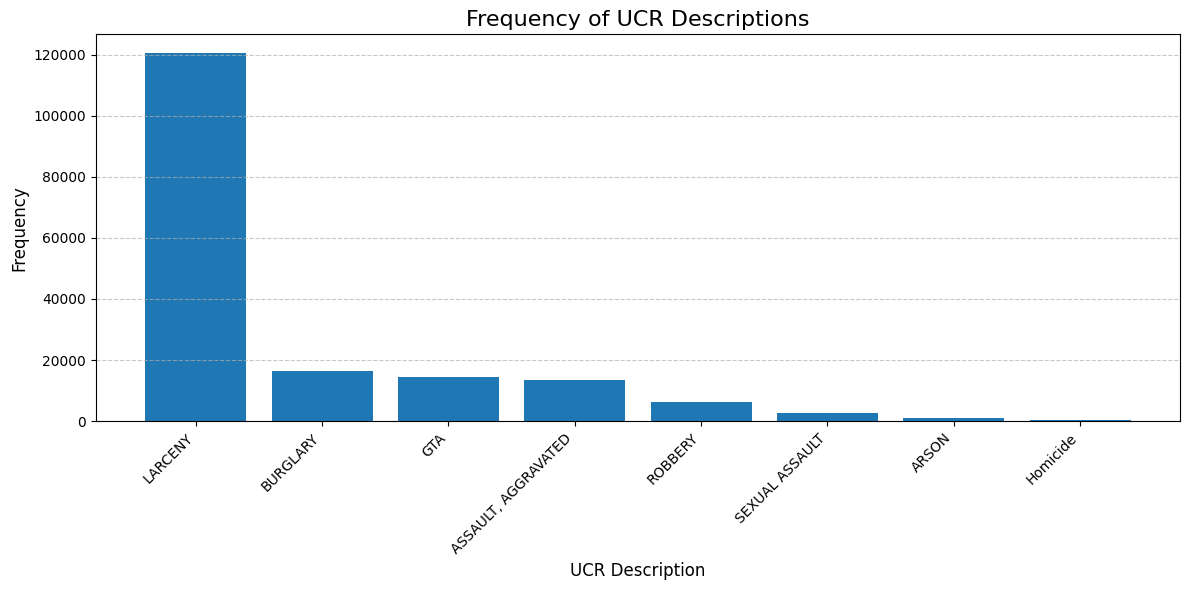

In [ ]:
# Count the frequency of each UCR description
ucr_freq = tprc['UCR_Description'].value_counts()

# Improved bar plot
plt.figure(figsize=(12, 6))  # Increase the figure size
plt.bar(ucr_freq.index, ucr_freq.values)  # Better bar styling
plt.title('Frequency of UCR Descriptions', fontsize=16)
plt.xlabel('UCR Description', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate x-axis labels with alignment
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for the y-axis
plt.tight_layout()  # Ensure proper spacing
plt.show()

In [ ]:
# mapping race
race_mapping = {
    "W": "White",
    "H": "Hispanic or Latino",
    "B": "Black or African American",
    "I": "American Indian or Alaska Native",
    "U": "Unknown/Not Recorded",
    "A": "Asian",
    "E": "Middle Eastern",
    "P": "Native Hawaiian or Other Pacific Islander"
}

tpa_viz = tpa.copy()
tpa_viz['race'] = tpa_viz['race'].str.strip()
tpa_viz['racef'] = tpa_viz['race'].map(race_mapping)

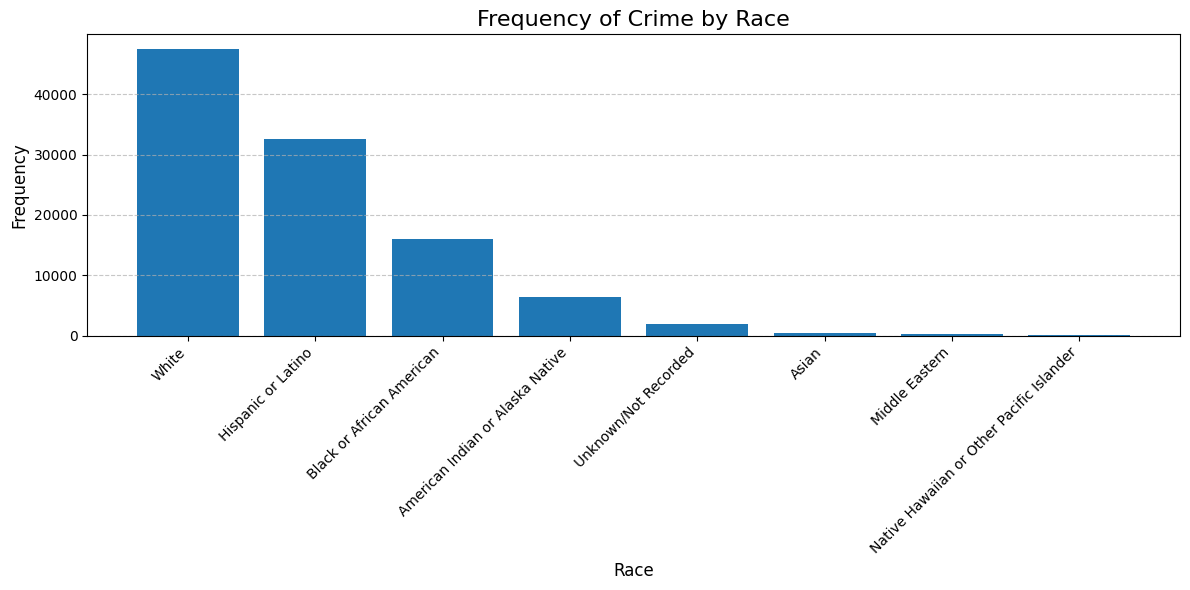

In [ ]:
race_freq = tpa_viz['racef'].value_counts()

plt.figure(figsize=(12, 6))  # Increase the figure size
plt.bar(race_freq.index, race_freq.values)  # Better bar styling
plt.title('Frequency of Crime by Race', fontsize=16)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate x-axis labels with alignment
plt.xlabel('Race', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for the y-axis
plt.tight_layout()  # Ensure proper spacing
plt.show()

In [ ]:
# mapping race
tpa_viz = tpa.copy()
months_mapping = {1: 'January',
                  2: 'February',
                  3: 'March',
                  4: 'April',
                  5: 'May',
                  6: 'June',
                  7: 'July',
                  8: 'August',
                  9: 'September',
                  10: 'October',
                  11: 'November',
                  12: 'December'}

tpa_viz['MONTH'] = tpa_viz['MONTH_ARR'].map(months_mapping)

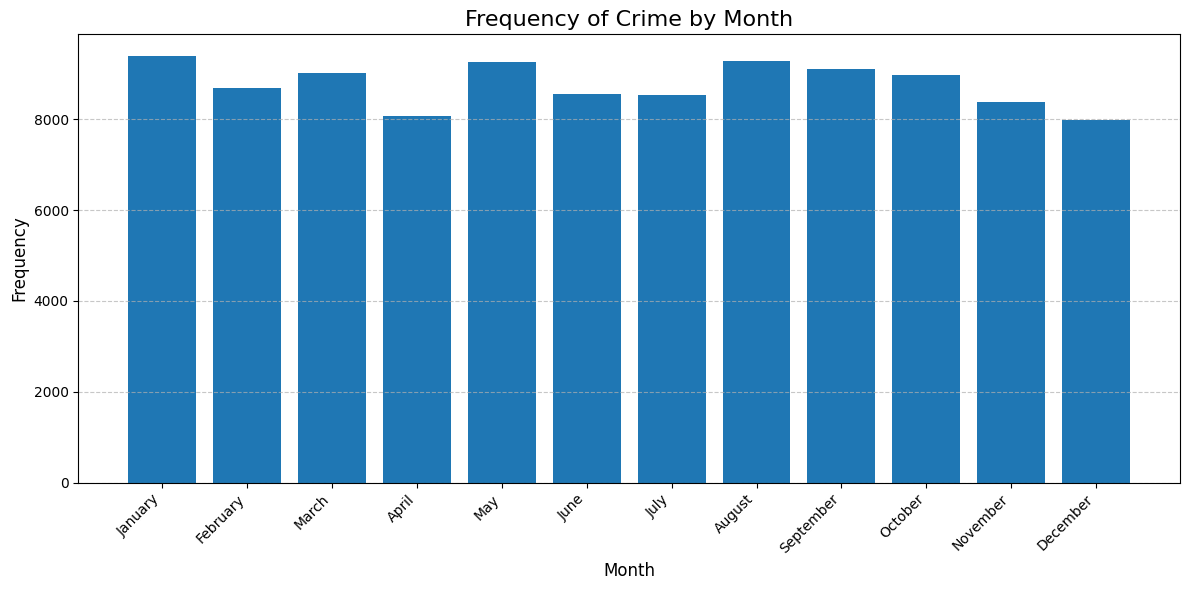

In [ ]:
month_freq = tpa_viz['MONTH'].value_counts().sort_index()

plt.figure(figsize=(12, 6))  # Increase the figure size
plt.bar(month_freq.index, month_freq.values)  # Better bar styling
plt.title('Frequency of Crime by Month', fontsize=16)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate x-axis labels with alignment
plt.xlabel('Month', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for the y-axis
plt.tight_layout()  # Ensure proper spacing
plt.show()

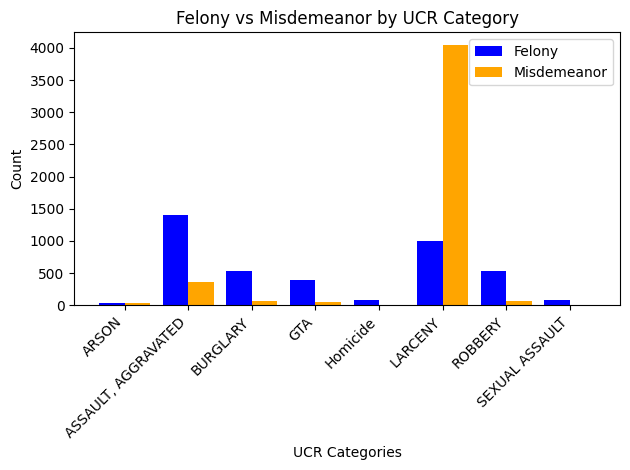

In [ ]:
# Calculate the number of felony and misdemeanor classifications per type of crime
ucr_fel = arrests[arrests['fel_misd'] == 'F']['UCR'].map(ucr_mapping).value_counts()
ucr_mis = arrests[arrests['fel_misd'] == 'M']['UCR'].map(ucr_mapping).value_counts()
ucr_indices = sorted(ucr_fel.index)

# Align counts for all categories
ucr_fel = ucr_fel.reindex(ucr_indices)
ucr_mis = ucr_mis.reindex(ucr_indices)

x = np.arange(len(ucr_indices)) # all x positions
bar_width = 0.4

# Plot the bars
plt.bar(x - bar_width / 2, ucr_fel.values, width=bar_width, label='Felony', color='blue')
plt.bar(x + bar_width / 2, ucr_mis.values, width=bar_width, label='Misdemeanor', color='orange')
plt.xticks(x, ucr_indices, rotation=45, ha='right')
plt.legend()
plt.xlabel('UCR Categories')
plt.ylabel('Count')
plt.title('Felony vs Misdemeanor by UCR Category')
plt.tight_layout()
plt.show()

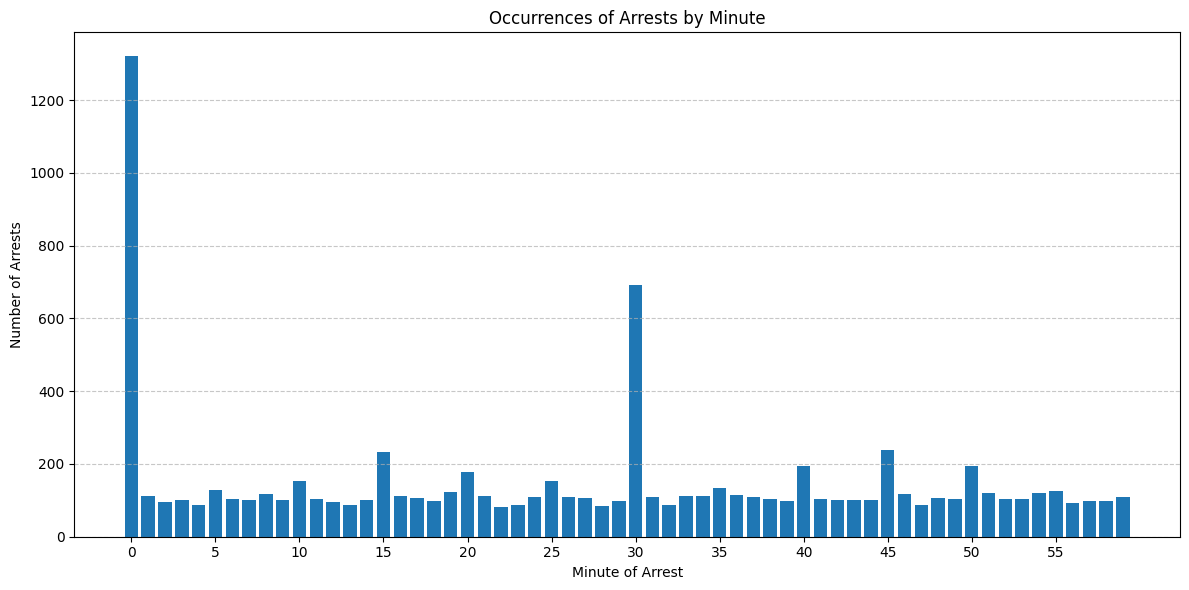

In [ ]:
# Assuming your DataFrame is named 'arrests' and has a column 'min_arr' representing the minute of arrest
arrests_by_minute = arrests['min_arr'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(arrests_by_minute.index, arrests_by_minute.values)
plt.title('Occurrences of Arrests by Minute')
plt.xlabel('Minute of Arrest')
plt.ylabel('Number of Arrests')
plt.xticks(range(0, 60, 5))  # Set x-axis ticks every 5 minutes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ensure proper spacing
plt.show()

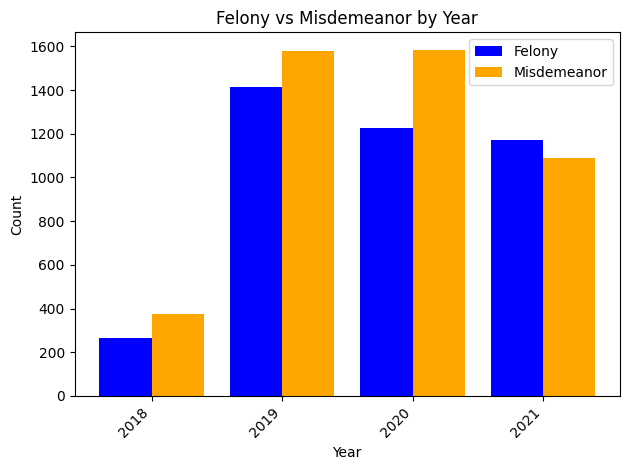

In [64]:
# Calculate the number of felony and misdemeanor classifications per year the crime was reported (before arrest was made)
year_fel = arrests[arrests['fel_misd'] == 'F']['Year'].value_counts()
year_mis = arrests[arrests['fel_misd'] == 'M']['Year'].value_counts()
year_indices = sorted(set(year_fel.index).union(set(year_mis.index)))

# Align counts for all categories
year_fel = year_fel.reindex(year_indices, fill_value=0)
year_mis = year_mis.reindex(year_indices, fill_value=0)

# Remove years with zero counts for both felony and misdemeanor
non_zero_indices = [year for year in year_indices if year_fel[year] > 0 or year_mis[year] > 0]
year_fel = year_fel[non_zero_indices]
year_mis = year_mis[non_zero_indices]

x = np.arange(len(non_zero_indices))  # all x positions
bar_width = 0.4

# Plot the bars
plt.bar(x - bar_width / 2, year_fel.values, width=bar_width, label='Felony', color='blue')
plt.bar(x + bar_width / 2, year_mis.values, width=bar_width, label='Misdemeanor', color='orange')
plt.xticks(x, non_zero_indices, rotation=45, ha='right')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Felony vs Misdemeanor by Year')
plt.tight_layout()
plt.show()

# Modeling

In [ ]:
arrests_model = arrests.copy()

arrests_model['MONTH_ARR'] = arrests_model['MONTH_ARR'].astype(int)
arrests_model['DOW_ARR'] = arrests_model['DOW_ARR'].astype(int)
arrests_model['hour_arr'] = arrests_model['hour_arr'].astype(int)
arrests_model['min_arr'] = arrests_model['min_arr'].astype(int)
arrests_model['date_arr'] = arrests_model['date_arr'].astype(int)
arrests_model['Day'] = arrests_model['Day'].astype(int)
arrests_model['Hour'] = arrests_model['Hour'].astype(int)
arrests_model['Minute'] = arrests_model['Minute'].astype(int)

# Convert all time data into a cyclical format
arrests_model['month_arr_sin'] = np.sin(2 * np.pi * arrests_model['MONTH_ARR'] / 12)
arrests_model['month_arr_cos'] = np.cos(2 * np.pi * arrests_model['MONTH_ARR'] / 12)
arrests_model['dow_arr_sin'] = np.sin(2 * np.pi * arrests_model['DOW_ARR'] / 7)
arrests_model['dow_arr_cos'] = np.cos(2 * np.pi * arrests_model['DOW_ARR'] / 7)
arrests_model['hour_arr_sin'] = np.sin(2 * np.pi * arrests_model['hour_arr'] / 24)
arrests_model['hour_arr_cos'] = np.cos(2 * np.pi * arrests_model['hour_arr'] / 24)
arrests_model['min_arr_sin'] = np.sin(2 * np.pi * arrests_model['min_arr'] / 60)
arrests_model['min_arr_cos'] = np.cos(2 * np.pi * arrests_model['min_arr'] / 60)
arrests_model['date_arr_sin'] = np.sin(2 * np.pi * arrests_model['date_arr'] / 31)
arrests_model['date_arr_cos'] = np.cos(2 * np.pi * arrests_model['date_arr'] / 31)

months = {'January': 1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
arrests_model['Month'] = arrests_model['Month'].apply(lambda x : months[x]).astype(int)
dow = {'Sun':1, 'Mon':2, 'Tue':3, 'Wed':4, 'Thu':5, 'Fri':6, 'Sat':7}
arrests_model['DayOfWeek'] = arrests_model['DayOfWeek'].apply(lambda x : dow[x]).astype(int)

arrests_model['Month_sin'] = np.sin(2 * np.pi * arrests_model['Month'] / 12)
arrests_model['Month_cos'] = np.cos(2 * np.pi * arrests_model['Month'] / 12)
arrests_model['Day_sin'] = np.sin(2 * np.pi * arrests_model['Day'] / 31)
arrests_model['Day_cos'] = np.cos(2 * np.pi * arrests_model['Day'] / 31)
arrests_model['Hour_sin'] = np.sin(2 * np.pi * arrests_model['Hour'] / 24)
arrests_model['Hour_cos'] = np.cos(2 * np.pi * arrests_model['Hour'] / 24)
arrests_model['Minute_sin'] = np.sin(2 * np.pi * arrests_model['Minute'] / 60)
arrests_model['Minute_cos'] = np.cos(2 * np.pi * arrests_model['Minute'] / 60)
arrests_model['DayOfWeek_sin'] = np.sin(2 * np.pi * arrests_model['DayOfWeek'] / 7)
arrests_model['DayOfWeek_cos'] = np.cos(2 * np.pi * arrests_model['DayOfWeek'] / 7)
# drop incident ID
arrests_model.drop(columns=['IncidentID', 'MONTH_ARR', 'DOW_ARR', 'hour_arr', 'min_arr', 'date_arr', 'Month', 'Day', 'Hour', 'Minute', 'DayOfWeek', 'case_id'], inplace=True)
arrests_model.head()

,YEAR_ARR,age,race,sex,ethnicity,arr_type,chrg_cnt,fel_misd,chrg_seq,DIVISION_NO,...,Month_sin,Month_cos,Day_sin,Day_cos,Hour_sin,Hour_cos,Minute_sin,Minute_cos,DayOfWeek_sin,DayOfWeek_cos
15692,2021,42,W,M,U,BK,1,F,18,T3,...,-0.866025,-0.500000,0.968077,-0.250653,-0.965926,0.258819,0.406737,-0.913545,0.974928,-0.222521
10612,2020,18,E,M,H,BK,1,F,17,T4,...,-0.866025,0.500000,0.724793,0.688967,-0.707107,0.707107,0.104528,0.994522,-0.781831,0.623490
388,2019,39,H,F,H,BK,1,M,15,T2,...,0.866025,0.500000,0.988468,0.151428,-0.866025,-0.500000,-0.587785,0.809017,-0.974928,-0.222521
2924,2019,56,B,M,U,BK,1,F,15,T3,...,-0.866025,-0.500000,0.485302,-0.874347,-0.965926,-0.258819,0.978148,0.207912,0.974928,-0.222521
10442,2020,51,B,M,U,BK,1,F,14,T3,...,-0.500000,-0.866025,0.394356,0.918958,0.707107,0.707107,0.669131,-0.743145,-0.974928,-0.222521


In [ ]:
# Fix the typings of category columns
arrests_model['DIVISION_NO'] = arrests_model['DIVISION_NO'].astype('category')
arrests_model['age'] = arrests_model['age'].astype(int)
arrests_model['race'] = arrests_model['race'].astype('category')
arrests_model['sex'] = arrests_model['sex'].astype('category')
arrests_model['ethnicity'] = arrests_model['ethnicity'].astype('category')
arrests_model['arr_type'] = arrests_model['arr_type'].astype('category')
arrests_model['arr_type'] = arrests_model['arr_type'].astype('category')
arrests_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8700 entries, 15692 to 17976
Data columns (total 96 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   YEAR_ARR       8700 non-null   category
 1   age            8700 non-null   int64   
 2   race           8700 non-null   category
 3   sex            8700 non-null   category
 4   ethnicity      8700 non-null   category
 5   arr_type       8700 non-null   category
 6   chrg_cnt       8700 non-null   int64   
 7   fel_misd       8700 non-null   object  
 8   chrg_seq       8700 non-null   int64   
 9   DIVISION_NO    8700 non-null   category
 10  POP0_CY        8700 non-null   int64   
 11  POP5_CY        8700 non-null   int64   
 12  POP10_CY       8700 non-null   int64   
 13  POP15_CY       8700 non-null   int64   
 14  POP20_CY       8700 non-null   int64   
 15  POP25_CY       8700 non-null   int64   
 16  POP30_CY       8700 non-null   int64   
 17  POP35_CY       8700 non-null   in

In [ ]:
# Create dummy variables for the categorical data
target = arrests_model['fel_misd']
arrests_model.drop(columns=['fel_misd'], inplace=True)
categories = arrests_model.select_dtypes(include=['category']).columns
dummies = pd.get_dummies(arrests_model, columns=categories ,drop_first=True)

# # separate the data into a 80/20 train test split
random_state = 123
X_train, X_test, y_train, y_test = train_test_split(dummies, target, test_size=0.2, random_state=random_state)
dummies.head()

,age,chrg_cnt,chrg_seq,POP0_CY,POP5_CY,POP10_CY,POP15_CY,POP20_CY,POP25_CY,POP30_CY,...,UCR_02,UCR_03,UCR_04,UCR_05,UCR_06,UCR_07,UCR_08,CallSource_Officer-Initiated,CallSource_Web Reported,CallSource_Detectiv
15692,42,1,18,140,127,123,128,188,209,202,...,False,False,True,False,False,False,False,False,False,False
10612,18,1,17,473,457,449,432,454,554,476,...,False,False,True,False,False,False,False,False,False,False
388,39,1,15,313,267,241,270,519,580,436,...,False,False,False,False,True,False,False,False,False,False
2924,56,1,15,167,142,140,161,421,323,306,...,False,False,False,False,True,False,False,False,True,False
10442,51,1,14,167,142,140,161,421,323,306,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest

In [ ]:
# create a hyperparameter grid for cross val tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}


# fit a random forest model and cross validate based on the hyperparameters using grid search
forest = RandomForestClassifier(random_state=random_state)
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train) # WARNING: this takes up to 40 minutes to run

# save the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best hyperparameters:", best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# evaluate performance on test data
y_pred = best_model.predict(X_test_scaled)
print("Accuracy on testing data:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy on testing data: 0.8729885057471264
              precision    recall  f1-score   support

           F       0.86      0.86      0.86       800
           M       0.88      0.88      0.88       940

    accuracy                           0.87      1740
   macro avg       0.87      0.87      0.87      1740
weighted avg       0.87      0.87      0.87      1740

[[692 108]
 [113 827]]


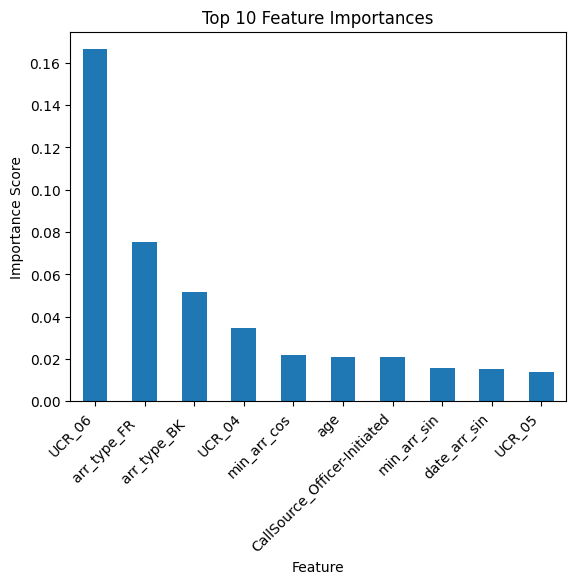

In [ ]:
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='bar')  # Plot the top 10 features
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
for pair in sorted(zip(best_model.feature_importances_, X_train.columns), reverse=True)[:50]:
  print(pair)

(0.1572501396770188, 'UCR_06')
(0.07795881623139812, 'arr_type_FR  ')
(0.06143587862541237, 'arr_type_BK  ')
(0.03305487051968544, 'UCR_04')
(0.022140978426353354, 'age')
(0.02135114191343888, 'min_arr_cos')
(0.02061561236251121, 'CallSource_Officer-Initiated')
(0.016996705492369656, 'min_arr_sin')
(0.01469797321993893, 'UCR_03')
(0.014072429879677996, 'UCR_05')
(0.01393852259081785, 'date_arr_sin')
(0.013051727714947914, 'Hour_cos')
(0.012874186632903179, 'Minute_sin')
(0.012840750704350876, 'hour_arr_cos')
(0.01259208223698524, 'Minute_cos')
(0.012240262810328273, 'UCR_07')
(0.012002405122739732, 'Day_sin')
(0.011816499343705246, 'hour_arr_sin')
(0.01175574384918201, 'CallSource_Web Reported')
(0.011618399933545121, 'Hour_sin')
(0.011486232509026304, 'date_arr_cos')
(0.010614144576919055, 'Day_cos')
(0.009863499614060856, 'POP0_CY')
(0.009587645949079657, 'month_arr_cos')
(0.009309833205717436, 'dow_arr_sin')
(0.009073398666664722, 'month_arr_sin')
(0.008900101461082707, 'chrg_seq')


## Logistic Regression

In [ ]:
# Create a logistic regression model
logistic_model = LogisticRegressionCV(cv=10, random_state=random_state, max_iter=1000, Cs=[0.01, 0.1, 1, 10, 100], scoring='accuracy')

# Fit the model and cross validate. Print out whichever C value was determined to the best hyperparameter
logistic_model.fit(X_train_scaled, y_train)

print("Best C value:", logistic_model.C_)

Best C value: [0.01]


In [ ]:
# Evaluate the model's performance
y_pred_logistic = logistic_model.predict(X_test_scaled)
print("Accuracy on testing data:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))

Accuracy on testing data: 0.8764367816091954
              precision    recall  f1-score   support

           F       0.87      0.86      0.86       800
           M       0.88      0.89      0.89       940

    accuracy                           0.88      1740
   macro avg       0.88      0.88      0.88      1740
weighted avg       0.88      0.88      0.88      1740

[[687 113]
 [102 838]]


In [ ]:
# determining the odds ratio of the coefficients
odds_ratios = np.exp(logistic_model.coef_[0])
odds_ratios = pd.Series(odds_ratios, index=X_train.columns, name='Odds ratio')
odds_ratios.sort_values(ascending=False, inplace=True)
print(logistic_model.classes_) # 0 is Felony and 1 is Misdemeanor
display(odds_ratios.head())
display(odds_ratios.tail())

['F' 'M']


,Odds ratio
UCR_06,2.339459
arr_type_FR,2.199953
CallSource_Officer-Initiated,1.176941
arr_type_PT,1.170896
age,1.160464


,Odds ratio
UCR_05,0.717782
arr_type_S,0.687192
Year_2021,0.684515
CallSource_Web Reported,0.645249
arr_type_BK,0.558505
